In [1]:
%matplotlib inline
import torch
import sys
sys.path.append('..')
import d2lzh_pytorch as d2l

In [2]:
import numpy as np

In [10]:
n_train,n_test,true_w,true_b = 100,100,[1.2,-3.4,5.6],5
features = torch.randn((n_test+n_train,1))
poly_features = torch.cat((features,torch.pow(features,2),torch.pow(features,3)),1) #cat连接张量，pow求幂次
labels = true_w[0]*poly_features[:,0] + true_w[1]*poly_features[:,1] +true_w[2]*poly_features[:,2] + true_b
labels += torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float)

In [12]:
features[:2],poly_features[:2],labels[:2]

(tensor([[-0.6288],
         [ 0.5885]]),
 tensor([[-0.6288,  0.3953, -0.2486],
         [ 0.5885,  0.3464,  0.2038]]),
 tensor([1.5159, 5.6756]))

In [14]:
def semilogy(x_vals,y_vals,x_label,y_label,x2_vals=None,y2_vals=None,legend = None,figsize=(3.5,2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals,y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals,y2_vals)
        d2l.plt.legend(legend)

In [15]:
num_epochs,loss = 100,torch.nn.MSELoss()

In [21]:
def fit_and_plot(train_features,test_features,train_labels,test_labels):
    net = torch.nn.Linear(train_features.shape[-1],1)
    
    batch_size = min(10,train_labels.shape[0])
    dataset = torch.utils.data.TensorDataset(train_features,train_labels)
    train_iter = torch.utils.data.DataLoader(dataset,batch_size,shuffle=True)
    
    optimizer = torch.optim.SGD(net.parameters(),lr=0.01)
    train_ls,test_ls = [],[]
    
    for _ in range(num_epochs):
        for X,y in train_iter:
            l = loss(net(X),y.view(-1,1))
            optimizer.zero_grad()#梯度清零
            l.backward()
            optimizer.step()
        train_labels = train_labels.view(-1,1)
        test_labels = test_labels.view(-1,1)
        train_ls.append(loss(net(train_features),train_labels).item())
        test_ls.append(loss(net(test_features),test_labels).item())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net.weight.data,
          '\nbias:', net.bias.data)

final epoch: train loss 0.00028346636099740863 test loss 475.9525451660156
weight: tensor([[ 1.2247, -3.3937,  5.5925]]) 
bias: tensor([4.9928])


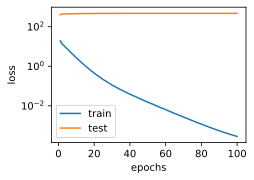

In [22]:
fit_and_plot(poly_features[:n_train,:],poly_features[n_train:,:],labels[:n_train],labels[:n_train])

final epoch: train loss 64.81519317626953 test loss 429.18206787109375
weight: tensor([[14.6521]]) 
bias: tensor([1.8527])


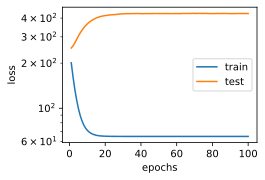

In [23]:
fit_and_plot(features[:n_train,:],features[n_train:,:],labels[:n_train],labels[:n_train])

final epoch: train loss 0.999190092086792 test loss 186.22679138183594
weight: tensor([[1.9308, 0.8411, 0.1241]]) 
bias: tensor([2.8848])


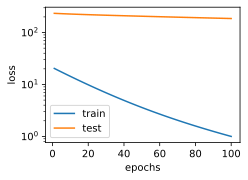

In [24]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2],
             labels[n_train:])